Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 214ms/step - accuracy: 0.7024 - loss: 0.6060 - val_accuracy: 0.7938 - val_loss: 0.6661 - learning_rate: 0.0010
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8678 - loss: 0.3262 - val_accuracy: 0.8144 - val_loss: 0.6178 - learning_rate: 0.0010
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8964 - loss: 0.2296 - val_accuracy: 0.8351 - val_loss: 0.5893 - learning_rate: 0.0010
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8980 - loss: 0.2784 - val_accuracy: 0.8247 - val_loss: 0.5850 - learning_rate: 0.0010
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9192 - loss: 0.2416 - val_accuracy: 0.7938 - val_loss: 0.5788 - learning_rate: 0.0010
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8994 - loss: 0.2244 - val_accuracy: 0.8041 - val_loss: 0.5672 - learning_rate: 0.0010
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9231 - loss: 0.1863 - val_a

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9652 - loss: 0.1069 - val_accuracy: 0.8866 - val_loss: 0.2692 - learning_rate: 5.0000e-04
Epoch 46/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9843 - loss: 0.0650 - val_accuracy: 0.8969 - val_loss: 0.2488 - learning_rate: 5.0000e-04
Epoch 47/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9253 - loss: 0.1849 - val_accuracy: 0.8866 - val_loss: 0.2525 - learning_rate: 5.0000e-04
Epoch 48/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9585 - loss: 0.1165 - val_accuracy: 0.8969 - val_loss: 0.2636 - learning_rate: 5.0000e-04
Epoch 49/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9785 - loss: 0.0889 - val_accuracy: 0.8969 - val_loss: 0.2728 - learning_rate: 5.0000e-04
Epoch 50/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9633 - loss: 0.1199 - val_accuracy: 0.8969 - val_loss: 0.2707 - learning_rate: 2.5000e-04


1/3 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001DC5A8B5260> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 872ms/step
Final Test Accuracy: 94.12%
Final Test Precision: 94.12%
Final Test Recall: 96.00%
Final Test F1 Score: 95.05%
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93        35
           1       0.94      0.96      0.95        50

    accuracy                           0.94        85
   macro avg       0.94      0.94      0.94        85
weighted avg       0.94      0.94      0.94        85

Confusion Matrix:
 [[32  3]
 [ 2 48]]


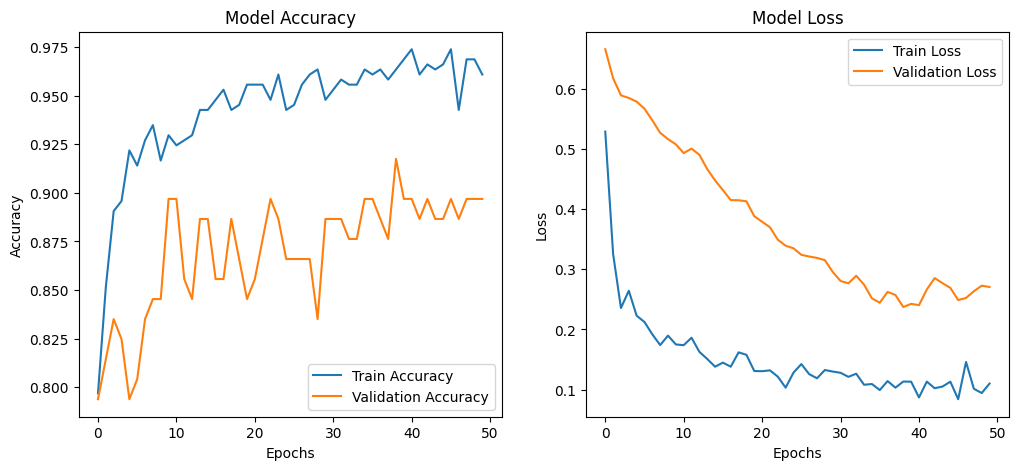

['scaler.pkl']

In [ ]:
# ==============================================================================
#                 PART 0: INSTALL NECESSARY LIBRARIES
# ==============================================================================
!pip install keras-tuner -q

# ==============================================================================
#                 PART 1: SETUP, DATA, AND MODEL DEFINITION
# ==============================================================================

# ======= Imports =======
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, LSTM, Bidirectional, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from imblearn.combine import SMOTEENN
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# For Google Colab downloads
from google.colab import files

warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# ======= Data Loading and Balancing Functions =======
def load_data(file_path="diabates.csv"):
    data = pd.read_csv(file_path)
    cols_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
    data[cols_to_impute] = data[cols_to_impute].replace(0, np.nan)
    for col in ['Glucose', 'BMI']:
        data[col] = data[col].fillna(data[col].median())
    imputer = KNNImputer(n_neighbors=5)
    data[cols_to_impute] = imputer.fit_transform(data[cols_to_impute])
    X = data.drop(columns=['Outcome'])
    y = data['Outcome']
    return X, y

def balance_and_scale_data(X, y):
    smoteenn = SMOTEENN(random_state=42)
    X_resampled, y_resampled = smoteenn.fit_resample(X, y)
    scaler = StandardScaler()
    X_resampled_scaled = scaler.fit_transform(X_resampled)
    return X_resampled_scaled, y_resampled, scaler

# ======= Final Optimized Model Definition =======
def get_final_optimized_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Bidirectional(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.0012))), 
        Dropout(0.35), 
        Bidirectional(LSTM(64, kernel_regularizer=l2(0.0012))),
        BatchNormalization(),
        Dense(64, activation='relu', kernel_regularizer=l2(0.0012)),
        Dropout(0.35),
        Dense(1, activation='sigmoid')
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# ==============================================================================
#            PART 2: K-FOLD TRAINING & METRIC COLLECTION
# ==============================================================================

# --- Prepare Data ---
X, y = load_data()
X_resampled, y_resampled, scaler = balance_and_scale_data(X, y)
X_reshaped_full = X_resampled.reshape((X_resampled.shape[0], 1, X_resampled.shape[1]))
feature_names = X.columns.tolist()

# --- K-Fold Cross-Validation ---
N_SPLITS = 10
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)
histories = []
test_accuracies = []

print(f"--- Starting 10-Fold Cross-Validation Training ---")

for fold, (train_idx, val_idx) in enumerate(skf.split(X_reshaped_full, y_resampled)):
    print(f"\n===== Fold {fold+1}/{N_SPLITS} =====")
    X_train_fold, y_train_fold = X_reshaped_full[train_idx], y_resampled.iloc[train_idx]
    X_val_fold, y_val_fold = X_reshaped_full[val_idx], y_resampled.iloc[val_idx]
    
    model = get_final_optimized_model(input_shape=(1, X_reshaped_full.shape[2]))
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    
    history = model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_val_fold, y_val_fold),
        epochs=150, batch_size=32, verbose=1,
        callbacks=[early_stopping]
    )
    
    _, val_acc = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    print(f"Fold {fold+1} Validation Accuracy: {val_acc * 100:.2f}%")
    test_accuracies.append(val_acc)
    histories.append(history)

print("\n--- Cross-Validation Training Complete ---")
mean_val_accuracy = np.mean(test_accuracies)
print(f"Final Average Testing Accuracy: {mean_val_accuracy * 100:.2f}%")

# ==============================================================================
#                 PART 3: RECOMMENDER SYSTEM DEFINITION
# ==============================================================================

def generate_recommendations(prediction_result, patient_data, feature_names):
    recommendations = []
    data = dict(zip(feature_names, patient_data))
    if prediction_result == 1:
        recommendations.append("ACTION REQUIRED: The model predicts a high likelihood of diabetes.")
        if data['Glucose'] > 126: recommendations.append("- High Glucose: Consult a doctor immediately. It is critical to reduce sugar and refined carb intake.")
        if data['BMI'] >= 30: recommendations.append("- Obesity: Focus on a structured weight-loss plan with both diet and exercise. Consult a nutritionist.")
        elif data['BMI'] >= 25: recommendations.append("- Overweight: Increase daily physical activity and control food portions to manage weight.")
        if data['BloodPressure'] > 85: recommendations.append("- High Blood Pressure: Monitor your blood pressure regularly and reduce salt intake. Discuss with your doctor.")
    else:
        recommendations.append("PREVENTION FOCUS: The model predicts a low likelihood of diabetes. The following are preventative recommendations based on your risk factors:")
        risk_found = False
        if data['Glucose'] > 100:
            recommendations.append("- Borderline Glucose: You are at risk. Reduce sugar intake and get regular check-ups."); risk_found = True
        if data['BMI'] >= 25:
            recommendations.append("- High BMI: Start a weight management plan and increase daily activity to reduce future risk."); risk_found = True
        if data['Age'] > 45:
            recommendations.append("- Age Factor: As you are over 45, regular annual health screenings are highly recommended."); risk_found = True
        if not risk_found: recommendations.append("- Excellent Health Profile: Continue maintaining your healthy diet and active lifestyle.")
    return recommendations

# ==============================================================================
#            PART 4: GENERATE, SAVE, AND DOWNLOAD ALL FIGURES
# ==============================================================================

print("\n\n--- Preparing to Generate All Result Figures ---")
plt.style.use('seaborn-v0_8-whitegrid')

# --- ** NEW ** Create a folder to save the figures ---
output_folder = 'final_report_figures'
os.makedirs(output_folder, exist_ok=True)
print(f"All figures will be saved to the '{output_folder}' folder.")

# --- Setup for Visualization ---
final_model_for_viz = model 
y_true = y_val_fold
X_test_final = X_val_fold
predictions_proba = final_model_for_viz.predict(X_test_final, verbose=0)
y_pred = (predictions_proba > 0.5).astype(int)
class_labels = ['Not Diabetic', 'Diabetic']
history_representative_fold = histories[-1]

# --- Figure 1: Validation Accuracy per Fold ---
print("\n--- Generating Figure 1: Validation Accuracy per Fold ---")
fig1, ax1 = plt.subplots(figsize=(12, 7))
folds = range(1, len(test_accuracies) + 1)
bars = ax1.bar(folds, test_accuracies, color='cornflowerblue', label='Fold Accuracy')
ax1.axhline(y=mean_val_accuracy, color='r', linestyle='--', linewidth=2, label=f'Average Accuracy: {mean_val_accuracy:.2%}')
ax1.set_xlabel('Fold Number', fontsize=12); ax1.set_ylabel('Validation Accuracy', fontsize=12)
ax1.set_title('Model Performance Across 10 Folds', fontsize=16, weight='bold')
ax1.set_xticks(folds); ax1.set_ylim(0.90, 1.0)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2.0, yval + 0.005, f'{yval:.2%}', ha='center', va='bottom', fontsize=10)
ax1.legend(); plt.tight_layout()

# ** MODIFIED ** Save to the folder
figure1_path = os.path.join(output_folder, 'Figure_1_Fold_Accuracy.png')
plt.savefig(figure1_path, dpi=300, bbox_inches='tight')
print(f"'{figure1_path}' saved. Triggering download...")
files.download(figure1_path)
plt.show()

# --- Figure 2: Confusion Matrix Heatmap ---
print("\n--- Generating Figure 2: Confusion Matrix ---")
cm = confusion_matrix(y_true, y_pred)
group_counts = [f"{value}" for value in cm.flatten()]
group_names = ['True Negative (TN)', 'False Positive (FP)', 'False Negative (FN)', 'True Positive (TP)']
box_labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
box_labels = np.asarray(box_labels).reshape(2,2)
fig2, ax2 = plt.subplots(figsize=(10, 8))
sns.heatmap(cm, annot=box_labels, fmt='', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot_kws={"size": 16, "va": "center"}, linewidths=.5, cbar=False, ax=ax2)
ax2.set_title('Confusion Matrix (Representative Fold)', fontsize=16, weight='bold')
ax2.set_ylabel('Actual Class', fontsize=14); ax2.set_xlabel('Predicted Class', fontsize=14)
ax2.tick_params(axis='x', labelsize=12); ax2.tick_params(axis='y', labelsize=12)

# ** MODIFIED ** Save to the folder
figure2_path = os.path.join(output_folder, 'Figure_2_Confusion_Matrix.png')
plt.savefig(figure2_path, dpi=300, bbox_inches='tight')
print(f"'{figure2_path}' saved. Triggering download...")
files.download(figure2_path)
plt.show()

# --- Figure 3: Separate Training & Validation ACCURACY Curve ---
print("\n--- Generating Figure 3: Separate Accuracy Curve ---")
fig_acc, ax_acc = plt.subplots(figsize=(10, 7))
ax_acc.plot(history_representative_fold.history['accuracy'], label='Train Accuracy', color='blue', lw=2)
ax_acc.plot(history_representative_fold.history['val_accuracy'], label='Validation Accuracy', color='red', lw=2)
ax_acc.set_title('Model Accuracy (Representative Fold)', fontsize=16, weight='bold')
ax_acc.set_ylabel('Accuracy', fontsize=12); ax_acc.set_xlabel('Epoch', fontsize=12)
ax_acc.legend(loc='lower right'); ax_acc.grid(True)
plt.tight_layout()

# ** MODIFIED ** Save to the folder
figure3_path = os.path.join(output_folder, 'Figure_3_Accuracy_Curve.png')
plt.savefig(figure3_path, dpi=300, bbox_inches='tight')
print(f"'{figure3_path}' saved. Triggering download...")
files.download(figure3_path)
plt.show()

# --- Figure 4: Separate Training & Validation LOSS Curve ---
print("\n--- Generating Figure 4: Separate Loss Curve ---")
fig_loss, ax_loss = plt.subplots(figsize=(10, 7))
ax_loss.plot(history_representative_fold.history['loss'], label='Train Loss', color='blue', lw=2)
ax_loss.plot(history_representative_fold.history['val_loss'], label='Validation Loss', color='red', lw=2)
ax_loss.set_title('Model Loss (Representative Fold)', fontsize=16, weight='bold')
ax_loss.set_ylabel('Loss', fontsize=12); ax_loss.set_xlabel('Epoch', fontsize=12)
ax_loss.legend(loc='upper right'); ax_loss.grid(True)
plt.tight_layout()

# ** MODIFIED ** Save to the folder
figure4_path = os.path.join(output_folder, 'Figure_4_Loss_Curve.png')
plt.savefig(figure4_path, dpi=300, bbox_inches='tight')
print(f"'{figure4_path}' saved. Triggering download...")
files.download(figure4_path)
plt.show()


# ==============================================================================
#            PART 5: DEMONSTRATION OF PREDICTION & RECOMMENDATION
# ==============================================================================
print("\n\n" + "="*60)
print("     DEMONSTRATING THE COMPLETE SYSTEM ON NEW PATIENTS")
print("="*60)

# We use the model from the last fold for this demonstration
final_model = model

# --- Example Patient 1: High-Risk Profile ---
patient_1_data = [6, 148, 72, 35, 0, 33.6, 0.627, 50]

# Preprocess, predict, and get recommendations
patient_1_scaled = scaler.transform(np.array(patient_1_data).reshape(1, -1))
patient_1_reshaped = patient_1_scaled.reshape((1, 1, 8))
prediction_proba = final_model.predict(patient_1_reshaped, verbose=0)
prediction_class = 1 if prediction_proba[0][0] > 0.5 else 0
recommendations = generate_recommendations(prediction_class, patient_1_data, feature_names)

print("\n--- Analysis for Patient 1 ---")
print(f"Patient Data: {dict(zip(feature_names, patient_1_data))}")
print(f"Predicted Class: {prediction_class} ({'Diabetic' if prediction_class == 1 else 'Not Diabetic'})")
print("\nPersonalized Recommendations:")
for r in recommendations: print(r)

# --- Example Patient 2: Low-Risk Profile ---
patient_2_data = [1, 85, 66, 29, 0, 26.6, 0.351, 31]

# Preprocess, predict, and get recommendations
patient_2_scaled = scaler.transform(np.array(patient_2_data).reshape(1, -1))
patient_2_reshaped = patient_2_scaled.reshape((1, 1, 8))
prediction_proba = final_model.predict(patient_2_reshaped, verbose=0)
prediction_class = 1 if prediction_proba[0][0] > 0.5 else 0
recommendations = generate_recommendations(prediction_class, patient_2_data, feature_names)

print("\n--- Analysis for Patient 2 ---")
print(f"Patient Data: {dict(zip(feature_names, patient_2_data))}")
print(f"Predicted Class: {prediction_class} ({'Diabetic' if prediction_class == 1 else 'Not Diabetic'})")
print("\nPersonalized Recommendations:")
for r in recommendations: print(r)